In [1]:
%pylab inline
from ipywidgets import interact_manual

Populating the interactive namespace from numpy and matplotlib


In [2]:
#fname = '../experiment3_1/simulated1_c4_e0.01_k21.dist'
fname = '../data/histograms/e_c4_k21.hist'
fname = '../data/histograms/simulated/simulated4_c50_e0.1_k21.dist'

In [3]:
import sys
sys.path.append('..')
from covest import *
from models import *
hist_orig, hist = load_hist(fname)

In [4]:
model = RepeatsModel(21, 100, hist, err_scale=100)

In [5]:
model.compute_loglikelihood(10, 0.05, 0.9, 0.9, 0.9)

0.05 100


-11193969.134002237

In [19]:
from functools import partial
count = 10
base_c = 35
range_c = 20
step_c = range_c/count
base_e = 0.07
range_e = 0.05
step_e = range_e/count

c_vals = arange(base_c - range_c, base_c + range_c, step_c)
e_vals = arange(base_e - range_e, base_e + range_e, step_e)

def compute_ll_for_params(q1=0.9, q2=0.9, q=0.9):
    likelihoods = model.compute_loglikelihood_multi([(c, e, q1, q2, q) for e in e_vals for c in c_vals])
    f1 = array([
        [likelihoods[(c, e, q1, q2, q)] for e in e_vals]
        for c in c_vals
    ])
    f1[isinf(f1)] = NaN
    return f1


In [20]:
def transform_for_visualisation(a):
    min_val, max_val = nanmin(a), nanmax(a)
    print(max_val)
    def transform(x):
        return log(1 - ((x - min_val) / (max_val - min_val + 1)))
    vtransform = vectorize(transform)
    return vtransform(a)

In [21]:
def draw_plot_for_q(q1=0.9, q2=0.9, q=0.9):
    f1 = compute_ll_for_params(q1, q2, q)
    ax = imshow(        
        transform_for_visualisation(f1), interpolation='none', cmap = 'jet',
        extent=[e_vals[0],e_vals[-1],c_vals[-1],c_vals[0]], aspect='auto',
    )
    colorbar(ax)
    show()

0.03 100
0.025 100
0.02 100
0.035 100
0.02 100
0.03 100
0.02 100
0.025 100
0.03 100
0.035 100
0.03 100
0.02 100
0.035 100
0.025 100
0.03 100
0.035 100
0.02 100
0.03 100
0.035 100
0.02 100
0.025 100
0.025 100
0.04 100
0.03 100
0.02 100
0.025 100
0.04 100
0.03 100
0.02 100
0.03 100
0.02 100
0.025 100
0.04 100
0.02 100
0.03 100
0.025 100
0.04 100
0.02 100
0.025 100
0.04 100
0.02 100
0.025 100
0.035 100
0.04 100
0.02 100
0.025 100
0.025 100
0.035 100
0.04 100
0.02 100
0.035 100
0.02 100
0.04 100
0.025 100
0.035 100
0.02 100
0.04 100
0.025 100
0.035 100
0.04 100
0.02 100
0.025 100
0.035 100
0.02 100
0.04 100
0.03 100
0.035 100
0.02 100
0.04 100
0.03 100
0.035 100
0.04 100
0.035 100
0.02 100
0.03 100
0.035 100
0.04 100
0.025 100
0.035 100
0.03 100
0.03 100
0.04 100
0.025 100
0.04 100
0.035 100
0.03 100
0.025 100
0.04 100
0.03 100
0.025 100
0.035 100
0.04 100
0.03 100
0.025 100
0.04 100
0.03 100
0.035 100
0.045 100
0.03 100
0.04 100
0.045 100
0.05 100
0.035 100
0.055 100
0.045 100
0.05 100
0.

/home/michal/.virtualenvs/covest/lib/python3.5/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


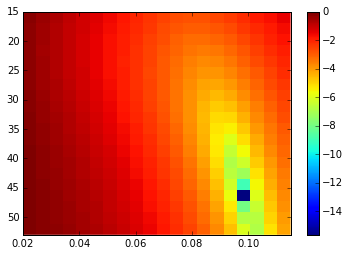

In [22]:
interact_manual(draw_plot_for_q, q1=(0.0, 1.0, .01), q2=(0.0, 1.0, 0.01), q=(0.0, 1.0, 0.01))